# Implementation of the AC-3 algorithm

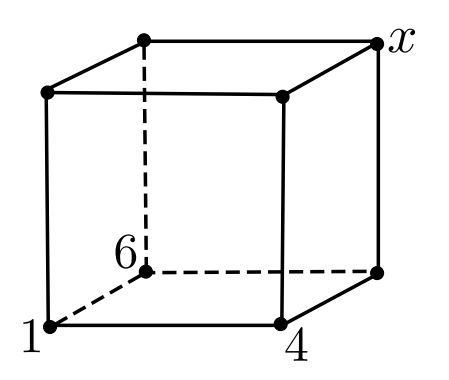

In [10]:
class Variable:
    def __init__(self, id_, domain):
        self.id = id_
        self.domain = domain
    def __str__(self):
        return f'{self.id}\t{self.domain}'

In [11]:
# x1 = Variable('X1', [1,2,3,4,5,6,7,8])
# x2 = Variable('X2', [1,2,3,4,5,6,7,8])
# x3 = Variable('X3', [4])
# x4 = Variable('X4', [1])
# x5 = Variable('X5', [1,2,3,4,5,6,7,8])
# x6 = Variable('X6', [1,2,3,4,5,6,7,8])
# x7 = Variable('X7', [1,2,3,4,5,6,7,8])
# x8 = Variable('X8', [6])

In [12]:
values = [
    ['A', [1,2,3,4,5]],
    ['B', [1,2,3,4,5]],
    ['C', [1,2,3,4,5]]
]

In [13]:
variables = {}
for item in values:
    variables[item[0]] = Variable(*item)

In [14]:
print(variables['A'])

A	[1, 2, 3, 4, 5]


In [15]:
#Definir restricciones

def c1(A, B, C):
    if B+1 == A+2 and B+1 == C+4 and A+2 == C+4:
        return True
    else:
        return False
    
def c2(A, B, C):
    if A + 5 == B + C + 2:
        return True
    else:
        return False
    

In [16]:
class Constrain:
    def __init__(self, id_, rel_variables, func):
        self.id = id_
        self.related_variables = rel_variables
        self.function = func
        
    # def evaluate(self, variable):
    #     return self.func(*self.related_variables)

In [17]:
# a = Constrain('C1', ['X1', 'X2'], different)

In [18]:
# constraints_values = [ ['R01', [x1, x2, x3, x4, x5, x6, x7, x8], equalSum],
#                        ['R02', [x1, x2, x3, x4, x2, x3, x6, x7], equalSum],
#                        ['R03', [x1, x2, x3, x4, x3, x4, x7, x8], equalSum],
#                        ['R04', [x1, x2, x3, x4, x1, x4, x5, x8], equalSum],
#                        ['R05', [x1, x2, x3, x4, x4, x3, x7, x8], equalSum],
#                        ['R06', [x1, x2], different],
#                        ['R07', [x1, x3], different],
#                        ['R08', [x1, x4], different],
#                        ['R09', [x1, x5], different],
#                        ['R10', [x1, x6], different],
#                        ['R11', [x1, x7], different],
#                        ['R12', [x1, x8], different],
#                        ['R13', [x2, x3], different],
#                        ['R14', [x2, x4], different],
#                        ['R15', [x2, x5], different],
#                        ['R16', [x2, x6], different],
#                        ['R17', [x2, x7], different],
#                        ['R18', [x2, x8], different],
#                        ['R19', [x3, x4], different],
#                        ['R20', [x3, x5], different],
#                        ['R21', [x3, x6], different],
#                        ['R22', [x3, x7], different],
#                        ['R23', [x3, x8], different],
#                        ['R24', [x4, x5], different],
#                        ['R25', [x4, x6], different],
#                        ['R26', [x4, x7], different],
#                        ['R27', [x4, x8], different],
#                        ['R28', [x5, x6], different],
#                        ['R29', [x5, x7], different],
#                        ['R30', [x5, x8], different],
#                        ['R31', [x6, x7], different],
#                        ['R32', [x6, x8], different],
#                        ['R33', [x7, x8], different],
#                      ]

In [19]:
constraints_values = [ ['C1', ['A','B','C' ], c1],
                       ['C2', ['A','B','C' ], c2],]

In [20]:
constrains = {}
for item in constraints_values:
    constrains[item[0]] = Constrain(*item)

In [21]:
from collections import deque
edges = []
for key in constrains:
    for var in constrains[key].related_variables:
        # print(var, key)
        if (var, key) not in edges:
            edges.append((var, key))

In [22]:
print(edges)

[('A', 'C1'), ('B', 'C1'), ('C', 'C1'), ('A', 'C2'), ('B', 'C2'), ('C', 'C2')]


In [23]:
edges_deque = deque(edges)

In [24]:
from itertools import product

In [25]:
while(edges_deque):
    variable_name, constraint_name = edges_deque.popleft()
    print(variable_name)
    for value in variables[variable_name].domain:
        # print(value)
        valid = False
        # print([variables[v].domain if v != variable_name else [value] for v in constrains[constraint_name].related_variables])
        for combination in product(*[variables[v].domain if v != variable_name else [value] for v in constrains[constraint_name].related_variables]):
            if constrains[constraint_name].function(*combination):
                print(combination)
                valid = True
                break
        if not valid:
            print('HAY ALGO NO VALIDO', value)
            
            variables[variable_name].domain.remove(value)
            # print([constrain for constrain, variable in edges])
            related_cons = [constrain for variable, constrain in edges if variable == variable_name]
            # print(related_cons)
            affected_edges = [(v, c) for v, c in edges if c in related_cons and v != variable_name]
            # print(affected_edges)
            edges_deque += deque(affected_edges)
            # print(edges_deque)
                
            
        # print([variables[v].domain for v in constrains[constraint_name].related_variables])
        # for combination in product([variables[v].domain for v in constrains[constraint_name].related_variables]):
        #     print(combination)
        

A
HAY ALGO NO VALIDO 1
(3, 4, 1)
(4, 5, 2)
HAY ALGO NO VALIDO 5
B
HAY ALGO NO VALIDO 1
HAY ALGO NO VALIDO 3
(4, 5, 2)
C
(3, 4, 1)
(4, 5, 2)
HAY ALGO NO VALIDO 3
HAY ALGO NO VALIDO 5
A
(2, 4, 1)
(3, 2, 4)
(4, 5, 2)
B
(3, 2, 4)
(2, 4, 1)
(3, 5, 1)
C
(2, 4, 1)
(3, 4, 2)
(3, 2, 4)
B
HAY ALGO NO VALIDO 2
(4, 5, 2)
C
(3, 4, 1)
(4, 5, 2)
HAY ALGO NO VALIDO 4
B
(2, 4, 1)
(3, 5, 1)
C
(2, 4, 1)
(3, 4, 2)
B
(3, 4, 1)
(4, 5, 2)
C
(3, 4, 1)
(4, 5, 2)
B
(2, 4, 1)
(3, 5, 1)
C
(2, 4, 1)
(3, 4, 2)
A
HAY ALGO NO VALIDO 2
(4, 5, 2)
C
(3, 4, 1)
(4, 5, 2)
A
(3, 4, 2)
(4, 5, 2)
C
(3, 5, 1)
(3, 4, 2)
A
(3, 4, 1)
(4, 5, 2)
C
(3, 4, 1)
(4, 5, 2)
A
(3, 4, 2)
(4, 5, 2)
C
(3, 5, 1)
(3, 4, 2)
A
(3, 4, 1)
(4, 5, 2)
B
(3, 4, 1)
(4, 5, 2)
A
(3, 4, 2)
(4, 5, 2)
B
(3, 4, 2)
(3, 5, 1)
A
(3, 4, 1)
(4, 5, 2)
B
(3, 4, 1)
(4, 5, 2)
A
(3, 4, 2)
(4, 5, 2)
B
(3, 4, 2)
(3, 5, 1)
A
(3, 4, 1)
(4, 5, 2)
C
(3, 4, 1)
(4, 5, 2)
A
(3, 4, 2)
(4, 5, 2)
C
(3, 5, 1)
(3, 4, 2)
A
(3, 4, 1)
(4, 5, 2)
B
(3, 4, 1)
(4, 5, 2)
A
(3, 4, 2)
(4, 5, 

In [26]:
for v in variables:
    print(variables[v].domain)

[3, 4]
[4, 5]
[1, 2]


In [76]:
deque([2,3]) + deque([5, 6])

deque([2, 3, 5, 6])

In [ ]:
aux = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
d = []
for item in aux:
    if item == variable_name:
        d.append([value])
    else:
        d.append(

In [ ]:
[variable[var_name].domain for var_name in constrain[

In [70]:
for item in product(*[[2, 3, 4], [2, 3, 4], [2, 3, 4], [2, 3, 4], [2, 3, 4], [2, 3, 4], [2, 3, 4], [2, 3, 4]]):
    print(item)

(2, 2, 2, 2, 2, 2, 2, 2)
(2, 2, 2, 2, 2, 2, 2, 3)
(2, 2, 2, 2, 2, 2, 2, 4)
(2, 2, 2, 2, 2, 2, 3, 2)
(2, 2, 2, 2, 2, 2, 3, 3)
(2, 2, 2, 2, 2, 2, 3, 4)
(2, 2, 2, 2, 2, 2, 4, 2)
(2, 2, 2, 2, 2, 2, 4, 3)
(2, 2, 2, 2, 2, 2, 4, 4)
(2, 2, 2, 2, 2, 3, 2, 2)
(2, 2, 2, 2, 2, 3, 2, 3)
(2, 2, 2, 2, 2, 3, 2, 4)
(2, 2, 2, 2, 2, 3, 3, 2)
(2, 2, 2, 2, 2, 3, 3, 3)
(2, 2, 2, 2, 2, 3, 3, 4)
(2, 2, 2, 2, 2, 3, 4, 2)
(2, 2, 2, 2, 2, 3, 4, 3)
(2, 2, 2, 2, 2, 3, 4, 4)
(2, 2, 2, 2, 2, 4, 2, 2)
(2, 2, 2, 2, 2, 4, 2, 3)
(2, 2, 2, 2, 2, 4, 2, 4)
(2, 2, 2, 2, 2, 4, 3, 2)
(2, 2, 2, 2, 2, 4, 3, 3)
(2, 2, 2, 2, 2, 4, 3, 4)
(2, 2, 2, 2, 2, 4, 4, 2)
(2, 2, 2, 2, 2, 4, 4, 3)
(2, 2, 2, 2, 2, 4, 4, 4)
(2, 2, 2, 2, 3, 2, 2, 2)
(2, 2, 2, 2, 3, 2, 2, 3)
(2, 2, 2, 2, 3, 2, 2, 4)
(2, 2, 2, 2, 3, 2, 3, 2)
(2, 2, 2, 2, 3, 2, 3, 3)
(2, 2, 2, 2, 3, 2, 3, 4)
(2, 2, 2, 2, 3, 2, 4, 2)
(2, 2, 2, 2, 3, 2, 4, 3)
(2, 2, 2, 2, 3, 2, 4, 4)
(2, 2, 2, 2, 3, 3, 2, 2)
(2, 2, 2, 2, 3, 3, 2, 3)
(2, 2, 2, 2, 3, 3, 2, 4)
(2, 2, 2, 2, 3, 3, 3, 2)


In [19]:

for e in edges:
    edges.popleft()

RuntimeError: deque mutated during iteration

In [ ]:
from itertools import product